In [1]:
import pandas as pd
import numpy as np

In [2]:
pres_url = "../../data/countypres_2000-2020.csv"

In [3]:
pres = pd.read_csv(pres_url)

In [5]:
vaccine_url = "../../data/COVID-19_Vaccinations_in_the_United_States_County.csv"

In [6]:
vacc = pd.read_csv(vaccine_url)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/COVID-19_Vaccinations_in_the_United_States_County.csv'

In [ ]:
vacc = vacc[(vacc["Recip_State"]=="TX") | (vacc["Recip_State"]=="FL") | (vacc["Recip_State"]=="CA") | (vacc["Recip_State"]=="IL") | (pres["Recip_State"]=="MI")]

In [7]:
geo_url = "../../data/geo.csv"

In [8]:
geo = pd.read_csv(geo_url)

In [10]:
geo.head(2)

,Sort [1],State,FIPS,County [2],County Seat(s) [3],Population(2010),Land Areakm²,Land Areami²,Water Areakm²,Water Areami²,Total Areakm²,Total Areami²,Latitude,Longitude
186,187,CA,6001,Alameda,Oakland,"1,510,271","1,914.046",739.017,213.185,82.311,"2,127.231",821.328,+37.648081°,–121.913304°
187,188,CA,6003,Alpine,Markleeville,"1,175","1,912.272",738.332,12.557,4.848,"1,924.829",743.180,+38.617610°,–119.798999°


In [11]:
pres.head(2)

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
628,2000,CALIFORNIA,CA,ALAMEDA,6001.0,PRESIDENT,AL GORE,DEMOCRAT,342889.0,494336.0,20191203,TOTAL
629,2000,CALIFORNIA,CA,ALAMEDA,6001.0,PRESIDENT,GEORGE W. BUSH,REPUBLICAN,119279.0,494336.0,20191203,TOTAL


In [12]:
vacc[(vacc["Recip_State"] == "AL") & (vacc["Recip_County"] == "Jefferson County") & (vacc["Date"].str[-4:]=="2020")].head(2)

NameError: name 'vacc' is not defined

In [13]:
vacc.head(2)

NameError: name 'vacc' is not defined

In [34]:
#pres cleanup
pres = pres.rename(columns={"county_fips":"FIPS"})
pres["FIPS"] = pres["FIPS"].astype(int)
pres = pres[(pres["state_po"]=="TX") | (pres["state_po"]=="FL") | (pres["state_po"]=="CA") | (pres["state_po"]=="IL") | (pres["state_po"]=="MI")]
pres_cleaned.dropna(inplace=True)

In [35]:
pres_cleaned = pres
pres_cleaned.head(2)

,year,state,state_po,county_name,FIPS,office,candidate,party,candidatevotes,totalvotes,version,mode
628,2000,CALIFORNIA,CA,ALAMEDA,6001,PRESIDENT,AL GORE,DEMOCRAT,342889.0,494336.0,20191203,TOTAL
629,2000,CALIFORNIA,CA,ALAMEDA,6001,PRESIDENT,GEORGE W. BUSH,REPUBLICAN,119279.0,494336.0,20191203,TOTAL


In [85]:
#geo cleanup
geo.replace(',','', regex=True, inplace=True)
geo["Longitude"] = geo["Longitude"].map(lambda l: float(l[1: -2])*-1 if l[0] == "–" else float(l[1: -2]))
geo["Latitude"] = geo["Latitude"].map(lambda l: float(l[1: -2])*-1 if l[0] == "–" else float(l[1: -2]))
geo.drop(["Land Areakm²", "Total Areakm²", "Water Areakm²", "County Seat(s) [3]", "Sort [1]", "County [2]", "State"], axis=1, inplace=True)
geo["FIPS"] = geo['FIPS'].map(lambda x: int("0" + str(x)))
geo = geo[(geo["State"]=="TX") | (geo["State"]=="FL") | (geo["State"]=="CA") | (geo["State"]=="IL") | (pres["State"]=="MI")]
geo_clean = geo

TypeError: 'float' object is not subscriptable

In [36]:
pres_groups = list(pres_cleaned.groupby(['year', 'FIPS']).groups.keys())

In [109]:
row_cols = ["year", "FIPS", "office", "state", "dem_votes", "rep_votes"]

In [110]:
pres_clean = pd.DataFrame(columns = row_cols)

In [112]:
error_group = None
for group in pres_groups:
    year = group[0]
    fips = group[1]
    office = 'president'
    g = pres_cleaned[(pres_cleaned['year'] == group[0]) & (pres_cleaned['FIPS'] == group[1])]
    g.index = np.arange(0, len(g))
    g_year = g.iloc[0]["year"]
    g_FIPS = g.iloc[0]["FIPS"]
    g_office = g.iloc[0]["office"]
    g_state = g.iloc[0]["state_po"]
    g_demvotes = g[g["party"]=="DEMOCRAT"]["candidatevotes"].values[0]
    g_repvotes = g[g["party"]=="REPUBLICAN"]["candidatevotes"].values[0]
    all_county = [[g_year, g_FIPS, g_office, g_state, g_demvotes , g_repvotes]]    
    pres_clean = pres_clean.append(pd.DataFrame(all_county, columns=row_cols))

In [113]:
#additional pres_clean cleaning:
pres_clean["total_votes"] = pres_clean["dem_votes"] + pres_clean["rep_votes"]

In [114]:
#pres_clean["per_win"] = pres_clean.apply(lambda row: pres_clean["dem_votes"]/pres_clean["total_votes"] *100 if pres_clean[""])

SyntaxError: invalid syntax (<ipython-input-114-cada7ef1aea4>, line 1)

In [115]:
# Create target column
pres_clean["target"] = pres_clean.apply(lambda row: 0 if row["dem_votes"] > row["rep_votes"] else 1, axis=1)

In [122]:
pres_clean[(pres_clean["year"]==2016) | (pres_clean["state"]=="CA")].head()

,year,FIPS,office,state,dem_votes,rep_votes,total_votes,target
0,2000,6001,PRESIDENT,CA,342889.0,119279.0,462168.0,0
0,2000,6003,PRESIDENT,CA,265.0,281.0,546.0,1
0,2000,6005,PRESIDENT,CA,5906.0,8766.0,14672.0,1
0,2000,6007,PRESIDENT,CA,31338.0,45584.0,76922.0,1
0,2000,6009,PRESIDENT,CA,7093.0,10599.0,17692.0,1


In [117]:
pres_clean.head(2)

,year,FIPS,office,state,dem_votes,rep_votes,total_votes,target
0,2000,6001,PRESIDENT,CA,342889.0,119279.0,462168.0,0
0,2000,6003,PRESIDENT,CA,265.0,281.0,546.0,1


In [123]:
j = pres_clean.merge(geo_clean, on="FIPS", how="inner")

In [126]:
j.to_csv("pres.csv")

In [124]:
j[j["year"]==2000]

,year,FIPS,office,state,dem_votes,rep_votes,total_votes,target,State,County [2],Population(2010),Land Areami²,Water Areami²,Total Areami²,Latitude,Longitude
0,2000,6001,PRESIDENT,CA,342889.0,119279.0,462168.0,0,CA,Alameda,1510271,739.017,82.311,821.328,37.64808,-121.91330
6,2000,6003,PRESIDENT,CA,265.0,281.0,546.0,1,CA,Alpine,1175,738.332,4.848,743.180,38.61761,-119.79899
12,2000,6005,PRESIDENT,CA,5906.0,8766.0,14672.0,1,CA,Amador,38091,594.583,11.373,605.956,38.44355,-120.65385
18,2000,6007,PRESIDENT,CA,31338.0,45584.0,76922.0,1,CA,Butte,220000,1636.464,40.667,1677.131,39.66595,-121.60191
24,2000,6009,PRESIDENT,CA,7093.0,10599.0,17692.0,1,CA,Calaveras,45578,1020.012,16.915,1036.927,38.18784,-120.55511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,2000,48499,PRESIDENT,TX,3893.0,9810.0,13703.0,1,TX,Wood,41964,645.234,50.484,695.718,32.78358,-95.38216
2861,2000,48501,PRESIDENT,TX,531.0,1911.0,2442.0,1,TX,Yoakum,7879,799.708,0.013,799.721,33.17239,-102.82377
2867,2000,48503,PRESIDENT,TX,1843.0,5022.0,6865.0,1,TX,Young,18550,914.468,16.391,930.859,33.15878,-98.67826
2873,2000,48505,PRESIDENT,TX,1638.0,953.0,2591.0,0,TX,Zapata,14018,998.412,59.603,1058.015,26.99698,-99.18260


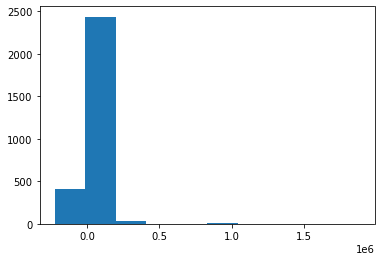

In [105]:
plt.hist((j.dem_votes - j.rep_votes));

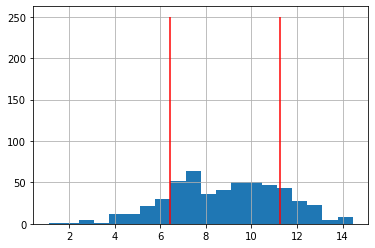

In [106]:
import matplotlib.pyplot as plt
diffs = np.log(j.dem_votes - j.rep_votes)
plt.hist(diffs, bins=20)
plt.vlines(diffs.mean()-diffs.std(), 0, 250, color='red')
plt.vlines(diffs.mean()+diffs.std(), 0, 250, color='red')
plt.grid()

In [107]:
diffs.mean()-diffs.std()

6.428659065532981

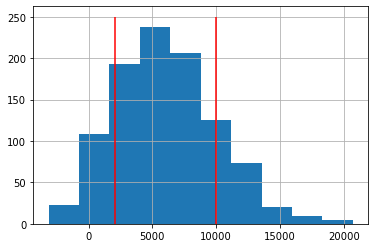

In [102]:
import matplotlib.pyplot as plt
diffs = [np.random.choice((j.dem_votes - j.rep_votes), size=481).mean() for x in range(1000)]
diffs = np.array(diffs)
plt.hist(diffs)
plt.vlines(diffs.mean()-diffs.std(), 0, 250, color='red')
plt.vlines(diffs.mean()+diffs.std(), 0, 250, color='red')
plt.grid();